# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D


In [2]:
df=pd.read_csv(r"C:\Users\Hitesh kumar\Downloads\cleaned_Startup_funding.csv")
df

,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,amount_category,investor_count
0,2015-04-03,Swiggy,Others,Unknown,Bangalore,"Accel Partners, SAIF Partners",Private Equity,2000000.0,Series A,2015,Medium,2
1,2015-05-30,Ather Energy,Others,Unknown,Bangalore,Tiger Global,Private Equity,12000000.0,Series A,2015,High,1
2,2015-05-28,Truweight,Others,Unknown,Hyderabad,Kalaari Capital,Private Equity,25795550.0,Series A,2015,High,1
3,2015-05-14,RedPolka,Others,Unknown,Mumbai,Undisclosed Investors,Seed Funding,250000.0,No Remark,2015,Low,1
4,2015-05-14,IndianRoots.com,Others,Unknown,Gurgaon,KJS Group,Private Equity,5000000.0,Series B,2015,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2020-01-13,Shuttl,Others,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,No Remark,2020,Medium,1
2869,2020-01-09,Mamaearth,Others,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,No Remark,2020,High,1
2870,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,3000000.0,No Remark,2020,Medium,1
2871,2020-01-02,Fashor,Others,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,No Remark,2020,Medium,1


## Plot bar charts of startup count per city and industry 

### Graph

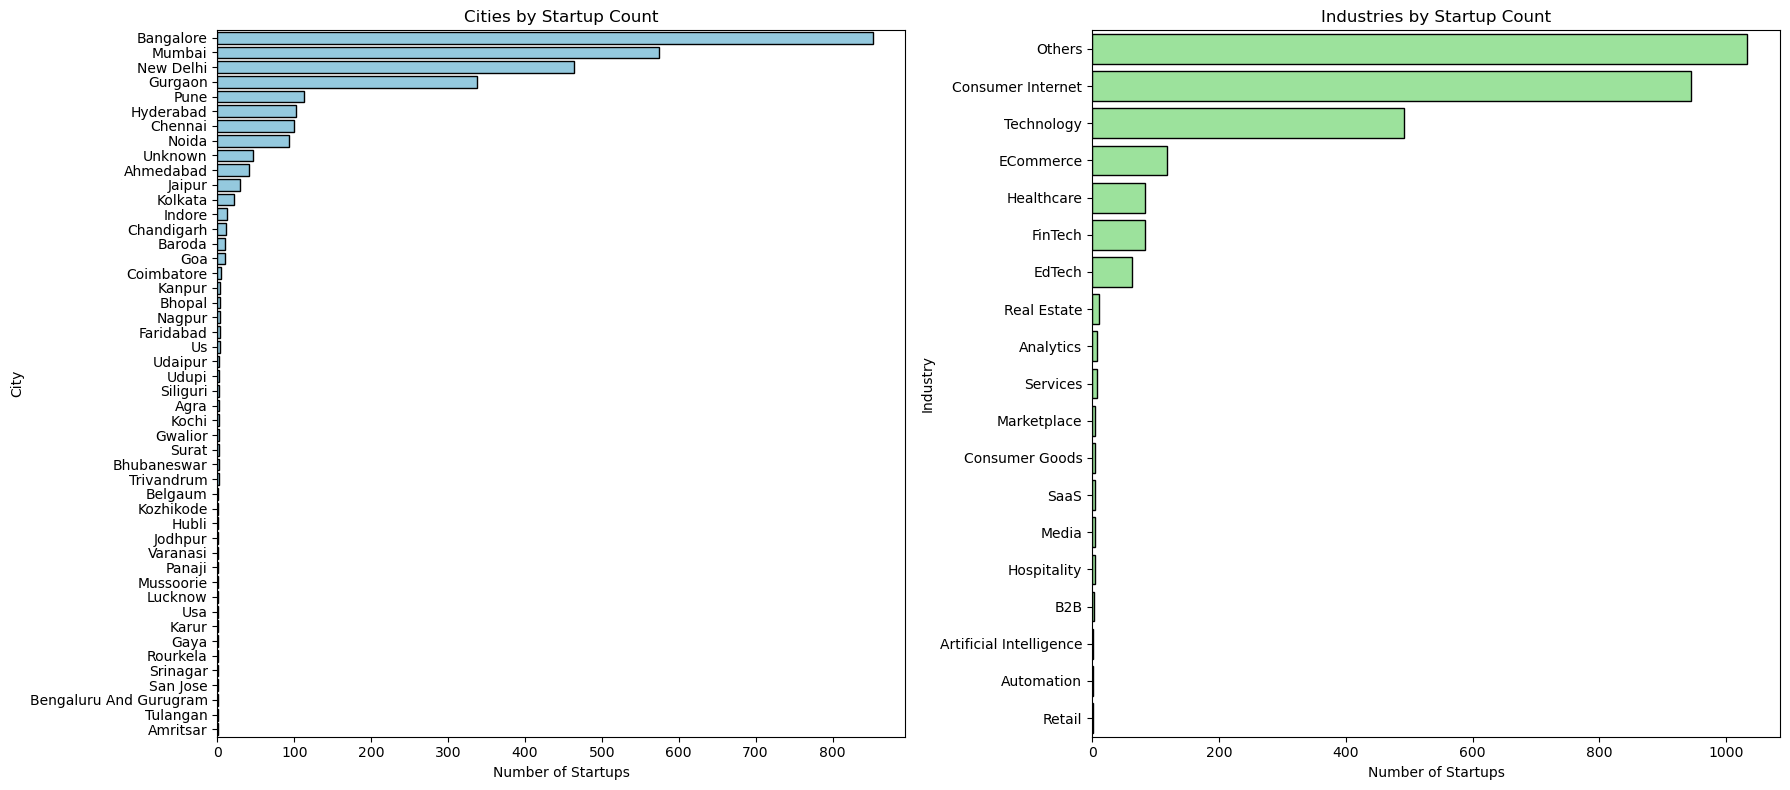

In [3]:
# Plot
plt.figure(figsize=(18, 8))

# City
plt.subplot(1, 2, 1)                            #Creates the first subplot in a 1-row, 2-column layout (1, 2, 1 means: 1st subplot).
top_cities = df['City_Location'].value_counts() #value_counts() returns a sorted Series with cities and their startup counts.
sns.barplot(x=top_cities.values, y=top_cities.index,color='skyblue',edgecolor='black') #horizontal bar chart
plt.title('Cities by Startup Count')
plt.xlabel('Number of Startups')
plt.ylabel('City')

# Industry
plt.subplot(1, 2, 2)
top_industries = df['Industry_Vertical'].value_counts()
sns.barplot(x=top_industries.values, y=top_industries.index,color='lightgreen',edgecolor='black')
plt.title('Industries by Startup Count')
plt.xlabel('Number of Startups')
plt.ylabel('Industry')

plt.tight_layout()  # adjusts spacing between plots so labels and titles don’t overlap.
plt.show()

### Insights

## Line chart of total funding amount per year (trendline)

### Graph

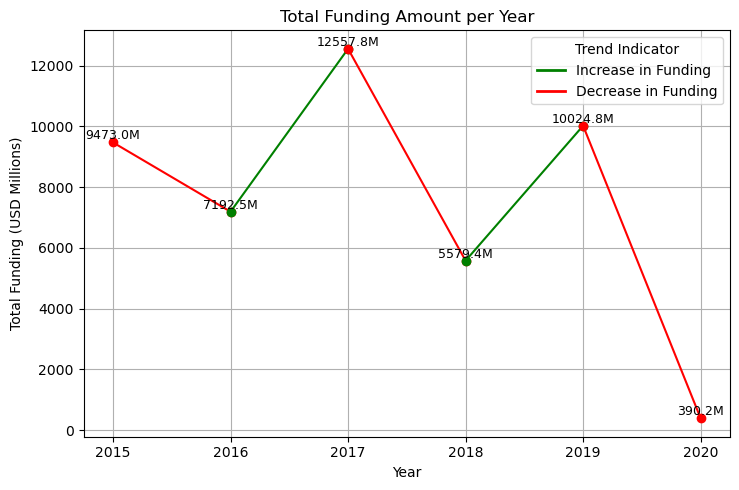

In [4]:
# Prepare data
funding_per_year = df.groupby('Year')['Amount_USD'].sum().reset_index()
funding_per_year['Amount_Millions'] = funding_per_year['Amount_USD'] / 1_000_000

years = funding_per_year['Year'].values
amounts = funding_per_year['Amount_Millions'].values

# Plot
plt.figure(figsize=(7.5, 5))
plt.title('Total Funding Amount per Year')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD Millions)')
plt.grid(True)

# Plot each segment in red or green
for i in range(1, len(years)):
    x_vals = [years[i-1], years[i]]
    y_vals = [amounts[i-1], amounts[i]]
    color = 'green' if amounts[i] >= amounts[i-1] else 'red'
    plt.plot(x_vals, y_vals, marker='o', color=color)

# Annotate points
for i in range(len(years)):
    plt.text(x=years[i],y=amounts[i],s=f'{amounts[i]:.1f}M',ha='center',va='bottom',fontsize=9,color='black')

# Custom legend
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='Increase in Funding'),
    Line2D([0], [0], color='red', lw=2, label='Decrease in Funding')
]
plt.legend(handles=legend_elements, loc='upper right', title='Trend Indicator', frameon=True)
plt.tight_layout()
plt.show()

### Insights

## Box plots comparing funding amounts across cities

### Graph

C:\Users\Hitesh kumar\AppData\Local\Temp\ipykernel_15324\1297450475.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_cities, x='City_Location', y='Amount_USD', palette='coolwarm')


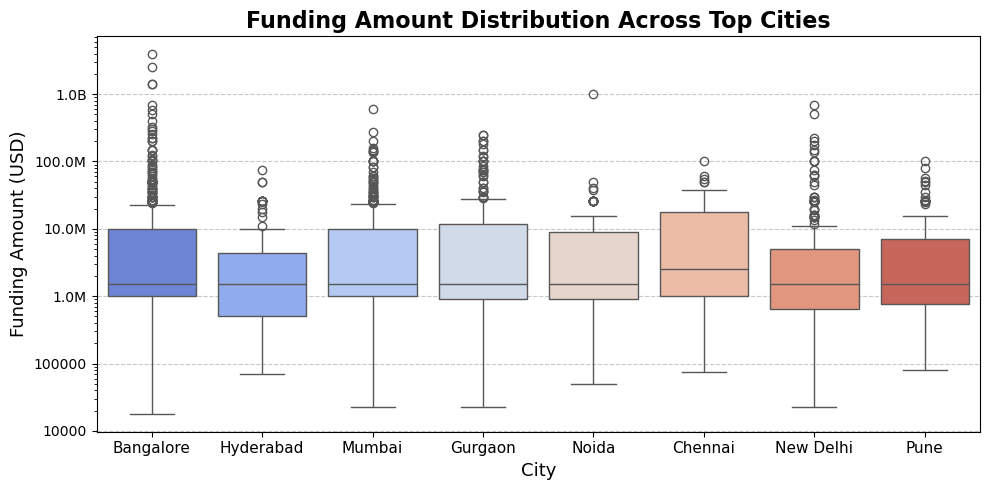

In [5]:
top_cities_list = df['City_Location'].value_counts().head(8).index
df_top_cities = df[df['City_Location'].isin(top_cities_list)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_top_cities, x='City_Location', y='Amount_USD', palette='coolwarm')

# Use log scale for y-axis to handle outliers
plt.yscale('log')
plt.xticks( fontsize=11)

plt.title('Funding Amount Distribution Across Top Cities', fontsize=16, weight='bold')
plt.xlabel('City', fontsize=13)
plt.ylabel('Funding Amount (USD)', fontsize=13)

# Format y-axis ticks to show human-friendly labels in millions or billions
def millions_billions(x, pos):
    if x >= 1_000_000_000:
        return f'{x*1e-9:.1f}B'  # Billions
    elif x >= 1_000_000:
        return f'{x*1e-6:.1f}M'  # Millions
    else:
        return f'{int(x)}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_billions))

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Insights

## Pie chart of investment types distribution

### Graph

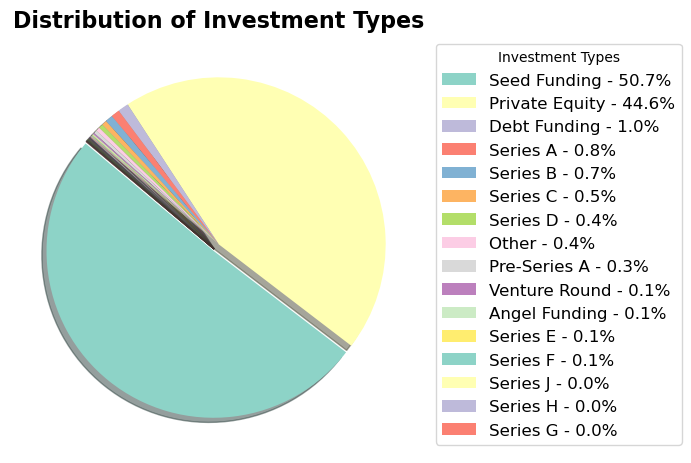

In [6]:
investment_counts = df['Investment_Type'].value_counts()
total = investment_counts.sum()
percentages = 100 * investment_counts / total

plt.figure(figsize=(7, 7))

# Color palette
colors = sns.color_palette('Set3')[0:len(investment_counts)]

# Explode first slice slightly for emphasis
explode = [0.05] + [0] * (len(investment_counts) - 1)

# Pie chart without percentages on slices
wedges, texts = plt.pie(
    investment_counts,
    labels=None,  # No labels on slices
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True
)

# Build legend labels with percentage values
legend_labels = [f'{label} - {percent:.1f}%' for label, percent in zip(investment_counts.index, percentages)]

# Add title with bold font
plt.title('Distribution of Investment Types', fontsize=16, weight='bold')

# Legend with percentages
plt.legend(
    wedges,
    legend_labels,
    title='Investment Types',
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()


### Insights

## Word cloud of most frequent investor names 

### Graph

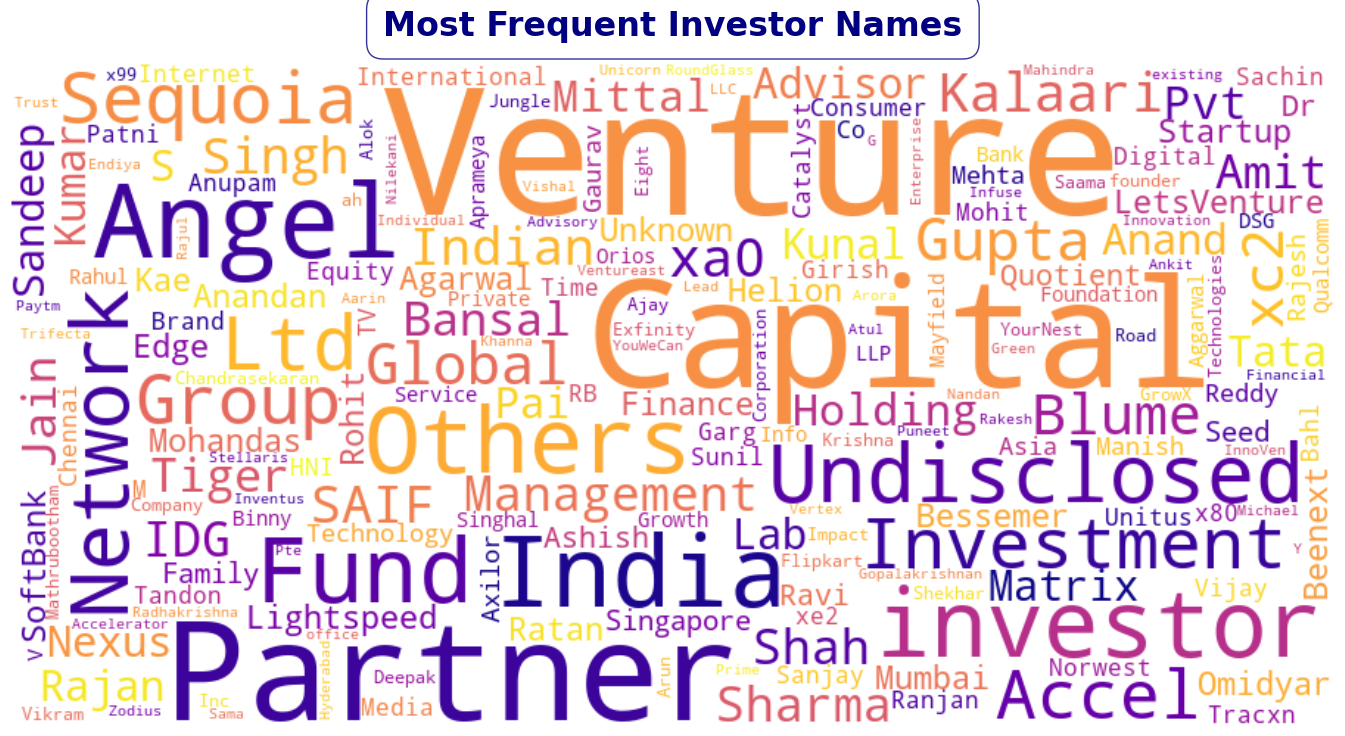

In [7]:
# Combine all investor names into one string
investor_text = ' '.join(df['Investors_Name'].dropna().astype(str))

# Generate word cloud with refined styling
wordcloud = WordCloud(
    width=900,
    height=450,
    background_color='white',
    colormap='plasma',      # smooth, vibrant colors
    contour_color='steelblue',
    contour_width=1.5,
    max_font_size=120,
    min_font_size=10,
    random_state=42,
    collocations=False      # avoid duplicate words
).generate(investor_text)

# Plotting
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Title with a shadow effect for better visibility
plt.title('Most Frequent Investor Names', fontsize=24, fontweight='bold', color='navy', pad=20,
          bbox=dict(facecolor='white', alpha=0.8, edgecolor='navy', boxstyle='round,pad=0.5'))

plt.tight_layout(pad=3)
plt.show()


### Insights

## Count plot of startups per funding round (Seed, Series A, etc.) 

### Graph

C:\Users\Hitesh kumar\AppData\Local\Temp\ipykernel_15324\614527904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Investment_Type'].isin(top_types.index)],y='Investment_Type', order=top_types.index, palette='coolwarm')


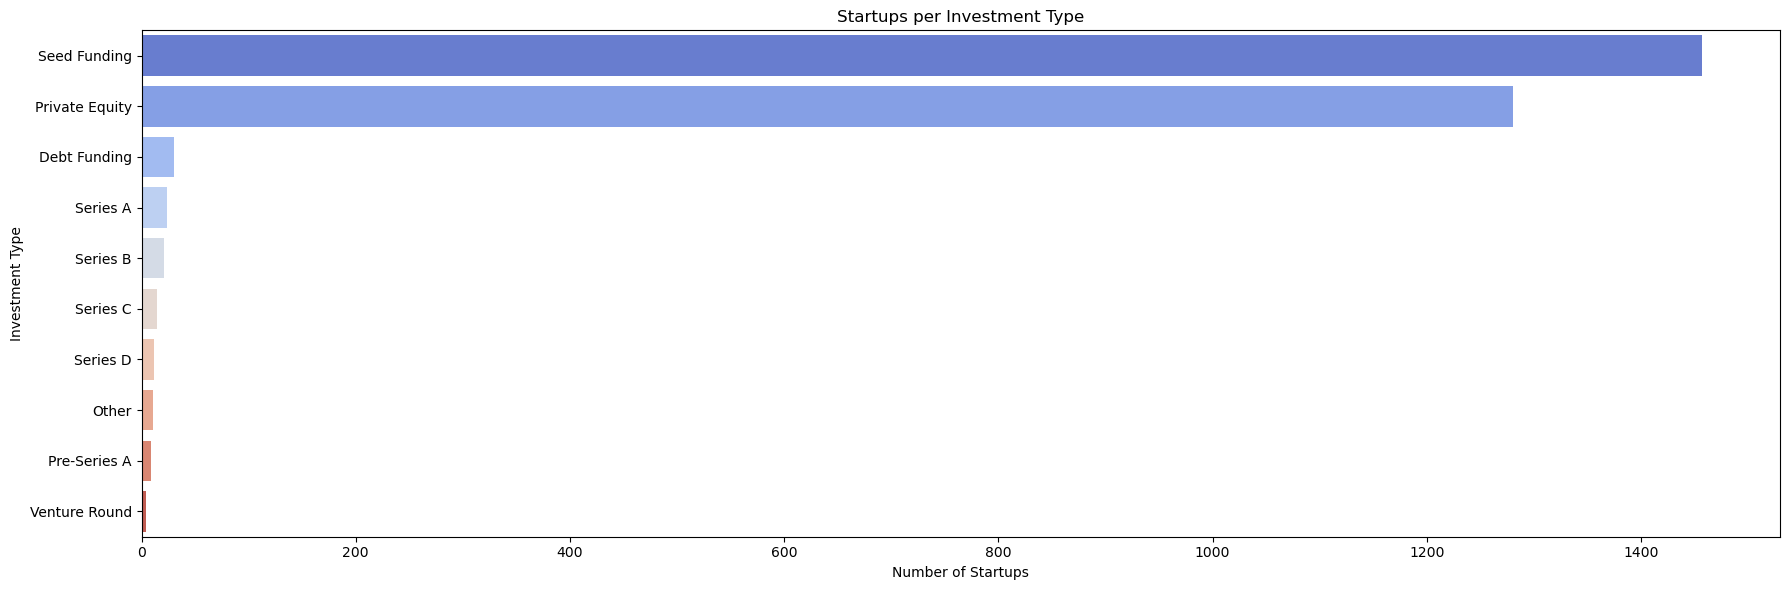

In [8]:
plt.figure(figsize=(18, 6))
top_types = df['Investment_Type'].value_counts().head(10)
sns.countplot(data=df[df['Investment_Type'].isin(top_types.index)],y='Investment_Type', order=top_types.index, palette='coolwarm')
plt.title("Startups per Investment Type")
plt.xlabel("Number of Startups")
plt.ylabel("Investment Type")
plt.tight_layout()
plt.show()

### Insights

## Correlation analysis between funding amount and number of investors 

### Graph

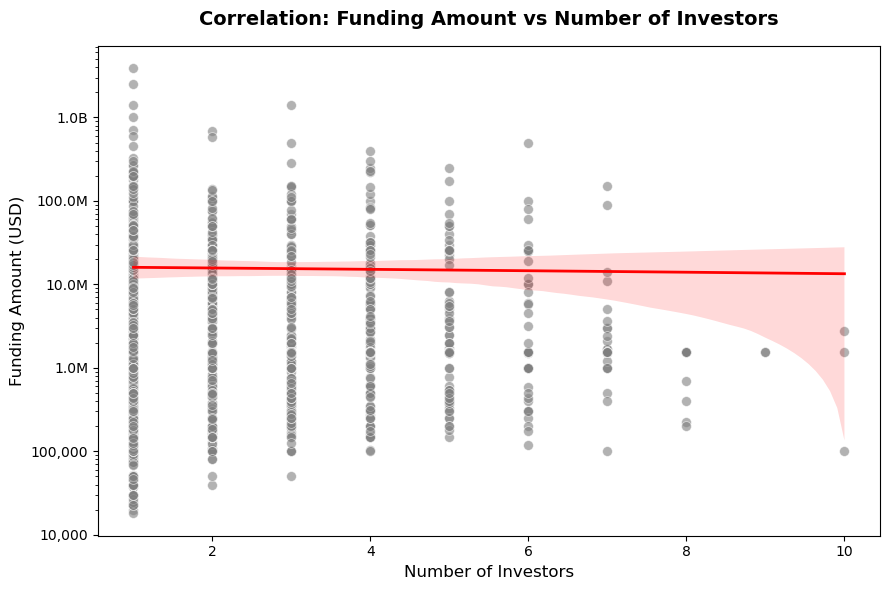

In [11]:
# Filter out non-positive funding amounts (log scale can't handle 0 or negative)
df_filtered = df[df['Amount_USD'] > 0].copy()

plt.figure(figsize=(9, 6))

# Scatterplot
sns.scatterplot(data=df_filtered,x='investor_count',y='Amount_USD',alpha=0.6,s=50,color='grey')

# Regression line
sns.regplot(data=df_filtered,x='investor_count',y='Amount_USD',scatter=False,color='red',line_kws={'linewidth': 2}
)

# Log scale on y-axis
plt.yscale('log')

# Human-friendly y-axis tick labels (e.g., 1M, 1B)
def format_large_ticks(x, pos):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    else:
        return f'{x:,.0f}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_large_ticks))

# Titles and axis labels
plt.title('Correlation: Funding Amount vs Number of Investors', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Number of Investors', fontsize=12)
plt.ylabel('Funding Amount (USD)', fontsize=12)

plt.tight_layout()
plt.show()


### Insights